# Fit Forecast
<center>
<img src="images/calories.png" />
</center>

This is a notebook for the project of the course "Fondamenti di Analisi dei Dati" of the University of Catania. The project consist in the prediction of the calories burned by a person during a physical activity. There is two dataset that will be used for this purpose. The first one is the "calories.csv" that contains the calories burned by a person during a physical activity. The second one is the "exercise.csv" that contains the data of the physical activity. 
<br /><br />
**Name:** Sergio  <br />
**Surname:** Mancini <br />
**ID:** 1000022352 <br />
**Course:** Fondamenti di Analisi dei Dati <br />
**Professor:** Antonino Furnari <br />
**A.Y.:** 2023/2024 <br />

## What appens when you do a physical activity?
During physical activity, the body utilizes calories as a source of energy to sustain the effort. Calories are burned to provide the necessary fuel to the muscles in action. Caloric expenditure varies based on the intensity and type of exercise, body weight, and individual metabolism. For example, high-intensity activities like running or cycling burn more calories compared to more moderate exercises such as walking.
<br /> <br />
Heart rate, or pulse rate, increases during physical exercise to pump more oxygen-enriched blood to the working muscles. At rest, a normal heart rate for adults is generally between 60 and 100 beats per minute (bpm), but it can drop to 40 to 60 bpm in well-trained athletes. During training, the heart rate can reach the "target zone," typically between 60% and 85% of the maximum heart rate, roughly calculated as 220 minus the person's age.
<br /> <br />
The body temperature will increase when the muscles are working, and the body will start to sweat to cool down. The breathing rate will also increase to provide more oxygen to the muscles. 
<br /> <br />
In summary, physical activity leads to an increase in caloric expenditure and heart rate, both of which are indicators of the intensity of physical effort and the body's response to exercise.

## What we are going to do?
Here are some crucial parameters we require. We'll consider factors such as the exercise duration, average beats per minute, heart rate during exercise, and body temperature. Additionally, we will utilize the person's height and weight to predict the calories burned.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

sns.set_style("whitegrid")

## Data collection and processing

The dataset used for this analysis comes from Kaggle and can be accessed at the following link: [Kaggle Dataset](https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos). This specific dataset was chosen for conducting the analysis at hand, providing relevant data for the purposes of the investigation. Utilizing datasets from Kaggle often serves as a valuable resource for exploring high-quality data from diverse communities and professionals.

In [3]:
calories = pd.read_csv('dataset/calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise = pd.read_csv('dataset/exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


### Combining the calories and exercise datasets

In [5]:
calories_data = pd.merge(exercise, calories, on='User_ID')
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
calories_data.shape

(15000, 9)

In [7]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


### Checking for missing values

In [8]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Data Analysis

In [9]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


We know that there are a total of 15,000 different individuals, so there are approximately 15,000 values for each characteristic. The average age is about 42.7, and we also have the standard deviation value, the minimum age, and the percentile value. The percentile, for example, indicates that the 25th percentile represents 25% of values below 28. So, in 15,000, it's possible to calculate the number of values below 28 for 25% of the individuals. 50% of the people in this dataset are below the age of 39. This is the meaning of percentiles, and it should not be confused with percentages, as there is a difference between them. Similarly, we have maximum values for each column, such as the mean height of individuals in the dataset, minimum weight, and the height value in centimeters (for example, 174 cm). We also observe the mean weight and minimum and maximum weight values, along with the duration and heart rate during exercise. Normal body temperature is around 37 degrees Celsius, while during exercise, the mean body temperature is around 40 degrees Celsius. We also have the mean values of burnt calories and minimum and maximum values. The key insight we need to gain is that heart rate and body temperature increase during exercise. This distinction is crucial for accurately calculating how many calories will be burned during that exercise.

### Gender

/var/folders/tc/p_p_2cj94qzbpbtyr09pl0yw0000gn/T/ipykernel_35424/144987370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=calories_data, palette='pastel')


<Axes: xlabel='Gender', ylabel='count'>

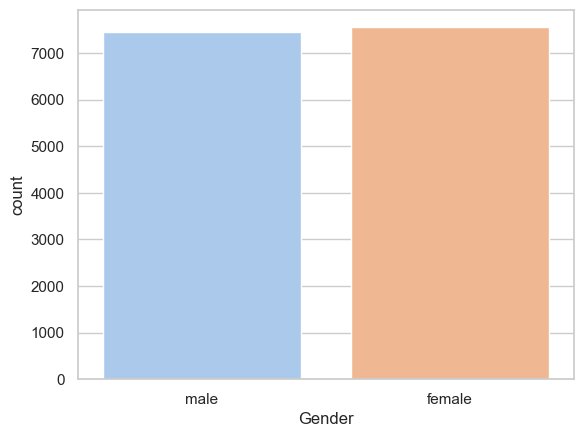

In [10]:
sns.set(style="whitegrid")
sns.countplot(x='Gender', data=calories_data, palette='pastel')


The important thing which we are getting here is the data point is almost similar. We can see the size here and we have equal distribution of male data points and female data points. It is a very good distributed dataset.

### Age
We employ a distribution plot to identify the most prevalent age range within the dataset. This implies that, for instance, individuals aged between 30 and 35 may be more abundant, and such patterns can be discerned through the distribution plot.

/var/folders/tc/p_p_2cj94qzbpbtyr09pl0yw0000gn/T/ipykernel_35424/808136696.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'], color='red')


<Axes: xlabel='Age', ylabel='Density'>

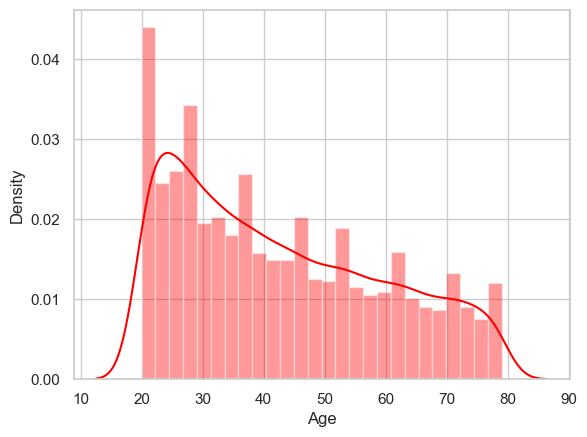

In [11]:
sns.distplot(calories_data['Age'], color='red')
#sns.displot(calories_data['Age'], color='red', kde=True)



The density indicates the amount of data present within a specific ```age``` group. We observe a higher concentration of values in the 20 to 30 range, followed by a gradual decrease. The curve exhibits a peak, signifying that within these 15,000 data points, a significant number of values fall between the ages of 20 and 30. As age increases, the number of values decreases, suggesting that fewer individuals tend to visit the gym at older ages. This observation highlights the influence of age on gym attendance. Additionally, there is a scarcity of values below 20. This distribution insight is valuable as it elucidates which age ranges have a greater representation in this particular dataset.

### Height

/var/folders/tc/p_p_2cj94qzbpbtyr09pl0yw0000gn/T/ipykernel_35424/4180845827.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'], color='red')


<Axes: xlabel='Height', ylabel='Density'>

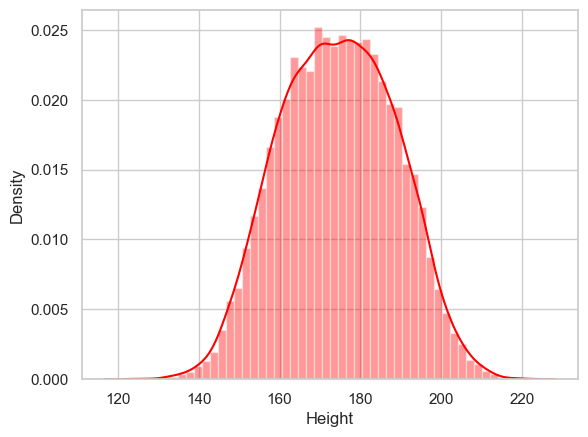

In [12]:
sns.distplot(calories_data['Height'], color='red')
#sns.displot(calories_data['Height'], color='red', kde=True)


We observe a normal distribution, with a higher concentration of individuals around ```heights``` of 160cm and 180cm. Those with exceptionally shorter or taller statures are relatively scarce. The distribution appears symmetrical, resembling a typical bell curve. However, there is a specific age range where the distribution of height values is less pronounced.

### Weight

/var/folders/tc/p_p_2cj94qzbpbtyr09pl0yw0000gn/T/ipykernel_35424/3963361483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'], color='red')


<Axes: xlabel='Weight', ylabel='Density'>

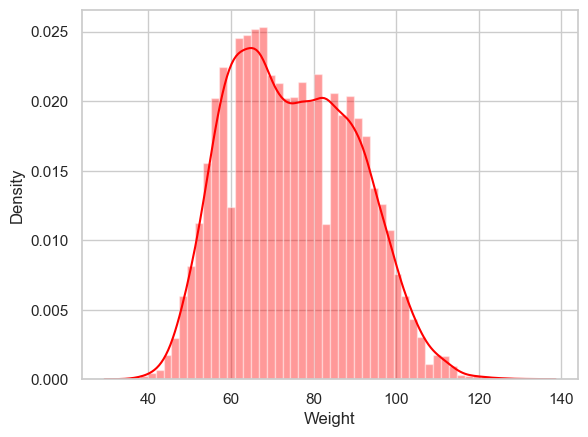

In [13]:
sns.distplot(calories_data['Weight'], color='red')
#sns.displot(calories_data['Weight'], color='red', kde=True)


Similarly, we can examine the distribution of ```weight```, revealing a predominant number of individuals with weights around 60 units. Additionally, there is an elevated frequency within the weight range of 80 to 100 units.

### Duration

/var/folders/tc/p_p_2cj94qzbpbtyr09pl0yw0000gn/T/ipykernel_35424/2238212321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'], color='red')


<Axes: xlabel='Duration', ylabel='Density'>

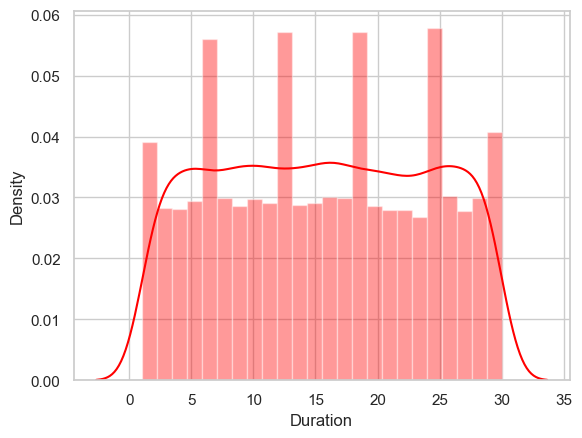

In [14]:
sns.distplot(calories_data['Duration'], color='red')
#sns.displot(calories_data['Duration'], color='red', kde=True)


On the x-axis, ```Duration``` is indicated, representing the workout time, while on the y-axis, "Density" is indicated, representing the relative frequency of each duration interval.
<br/><br/>
1. **Mean and Most Common Values (Peaks):**
    - **Physiological Adaptation:** The presence of peaks around 10, 20, and 30 minutes may indicate that most people find these time intervals manageable and sufficient for an effective workout. This could be attributed to physiological adaptation, where the body responds positively to these exercise periods. 
    - **Daily Routine:** These values may also reflect people's daily routines, where they find it easier to fit medium-duration workout sessions into their daily schedule.

2. **Less Common Values (Troughs):**
    - **Time Commitment:** Longer durations require more time commitment, which may not be compatible with the daily commitments of many individuals, making these values less common.
    - **Fatigue and Recovery:** Longer workouts can also lead to increased fatigue and require longer recovery times, which may discourage individuals from opting for more extended sessions.
    - **Fitness Level:** Individuals with a higher fitness level may be able to handle longer workouts, but these individuals may be less numerous in the general population.





### Heart Rate

/var/folders/tc/p_p_2cj94qzbpbtyr09pl0yw0000gn/T/ipykernel_35424/117247220.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'], color='red')


<Axes: xlabel='Heart_Rate', ylabel='Density'>

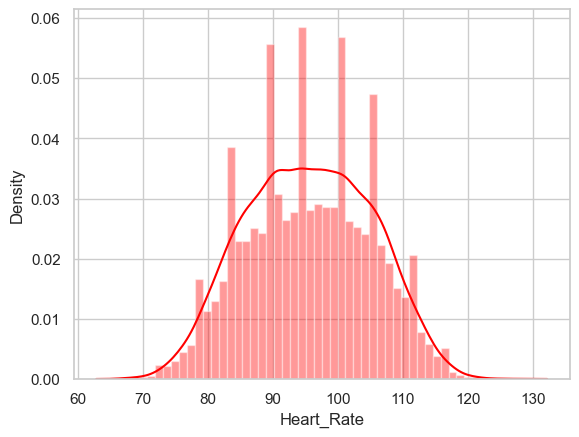

In [15]:
sns.distplot(calories_data['Heart_Rate'], color='red')
#sns.displot(calories_data['Heart_Rate'], color='red', kde=True)


On the x-axis, ```Heart_Rate``` is labeled and ranges from 60 to 130, while on the y-axis, "Density" is labeled and varies from 0.00 to 0.06.

- **Common Values (60-80 bpm):** These values are typical for resting heart rate in healthy adults and may reflect moments of rest or low activity.
- **Moderate Values (80-100 bpm):** These values may be associated with light physical activity or a state of restlessness or anxiety.
- **Elevated Values (100-130 bpm):** Higher values are common during moderate or intense physical exercise and may indicate effort levels during training.
<br/><br/>
The presence of less common values at the extremes of the histogram may be due to individual variations in heart rate, specific health conditions, or moments of intense physical activity or complete rest. It is important to note that these data should be interpreted in the context of overall health and the activity level of each individual.

### Body Temperature

/var/folders/tc/p_p_2cj94qzbpbtyr09pl0yw0000gn/T/ipykernel_35424/177403408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'], color='red')


<Axes: xlabel='Body_Temp', ylabel='Density'>

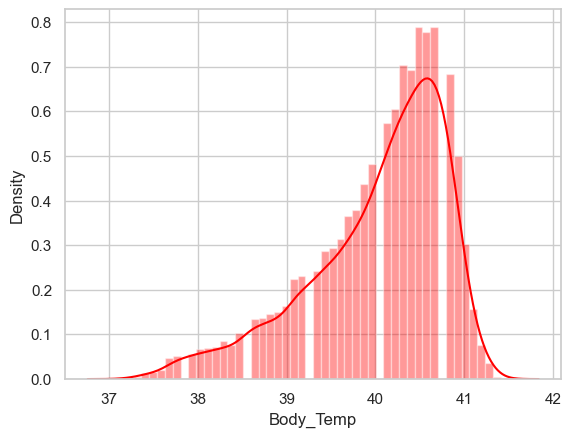

In [16]:
sns.distplot(calories_data['Body_Temp'], color='red')
#sns.displot(calories_data['Body_Temp'], color='red', kde=True)


On the x-axis, ```Body_Temp``` (Body Temperature) is indicated, ranging from 37 to 42 degrees Celsius, while on the y-axis, "Density" is indicated, representing the frequency of occurrences for each temperature.

- **Common Values (37-38°C):** These values are typical for body temperature during light or moderate exercise and may reflect the body's adaptation to physical activity.
- **Elevated Values (above 38°C):** Higher temperatures may occur during intense exercises or in warm environments and may require attention to avoid heat overload.

### Calories Burned

/var/folders/tc/p_p_2cj94qzbpbtyr09pl0yw0000gn/T/ipykernel_35424/1677238240.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Calories'], color='red')


<Axes: xlabel='Calories', ylabel='Density'>

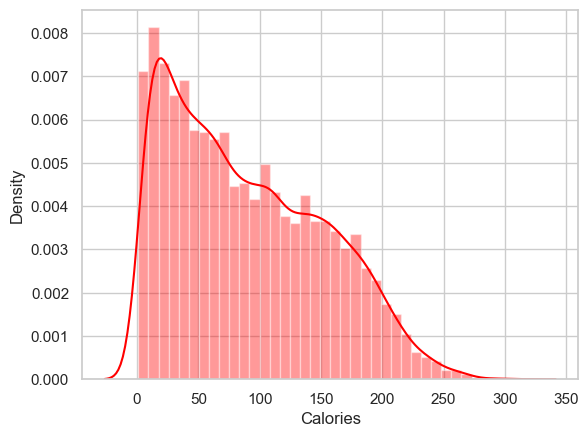

In [17]:
sns.distplot(calories_data['Calories'], color='red')
#sns.displot(calories_data['Calories'], color='red', kde=True)


On the x-axis, the number of ```calories``` is indicated, ranging from 0 to 350, while on the y-axis, density is indicated, ranging from 0.000 to 0.008. The curve peaks around 50 calories and then gradually decreases towards higher caloric values.

- **Curve Peak:** The peak around 50 calories may indicate the average number of calories burned during common or moderate-intensity workouts.
- **Caloric Distribution:** The curve shows that fewer people burn a high number of calories, which is consistent with longer or more intense workouts that are less common.
- **Calories and Workout Intensity:** Generally, the more intense or longer the workout, the more calories are burned. This graph may reflect various types of training, from light to more intense workouts.

## Finding the correlation between the variables
The correlation can be positive or negative. A positive correlation implies that as one variable increases, the other variable also increases. Conversely, a negative correlation indicates that as one variable increases, the other variable decreases.

In [18]:
numeric_columns = calories_data.select_dtypes(include='number')
correlation = numeric_columns.corr()


### Heatmap to visualize the correlation

<Axes: >

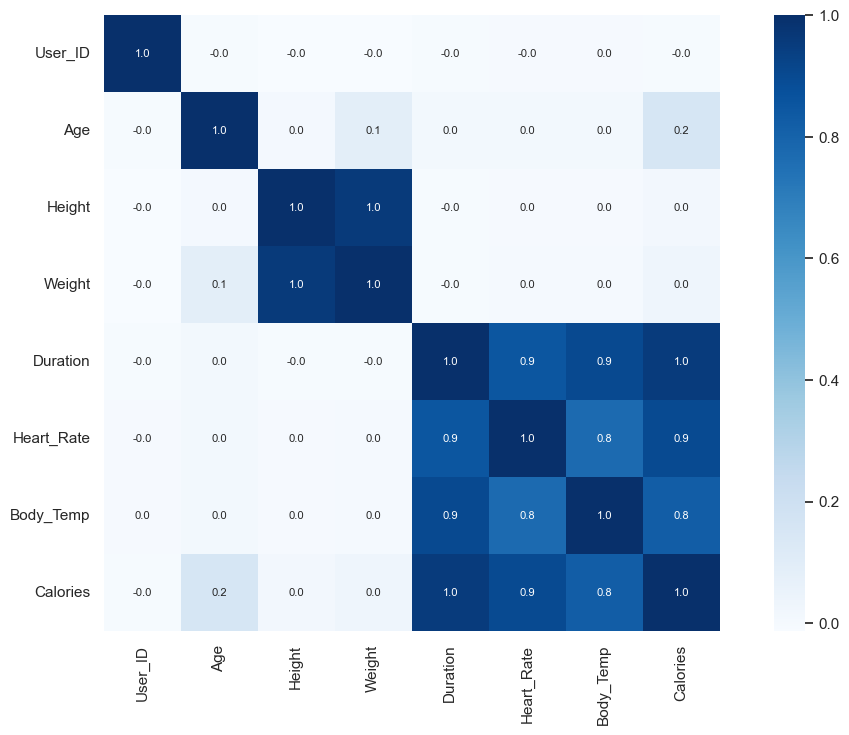

In [19]:
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap='Blues', cbar=True, square=True, fmt='.1f', annot_kws={'size':8})

>The heatmap is a graphical representation of data in which values are depicted by color. It is an effective tool for visualizing the correlation between variables. The color intensity and the number indicate the strength of the correlation. 

We have values ranging from 0 to 1, where 0 signifies the lowest value and 1 represents the highest. This value is computed based on the relationship between various features, such as user ID, age, height, weight, and more. The column names are displayed on both the x and y axes. Each column is compared to the others, and if the value is close to 1, it indicates a positive correlation, implying that the two columns are positively associated. Conversely, if the value is close to 0, it signifies a negative correlation, suggesting an inverse relationship between the columns. A value of 0 implies no correlation at all.

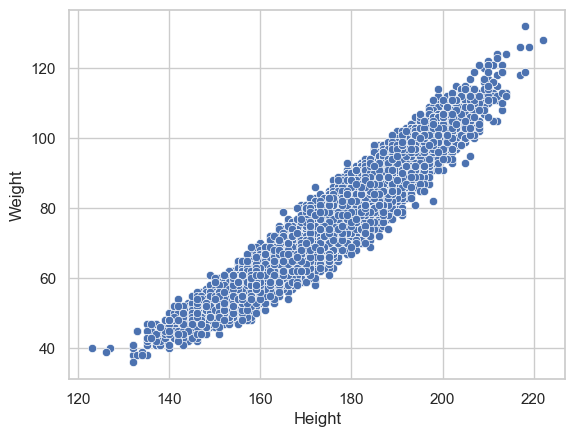

In [20]:
sns.scatterplot(x='Height', y='Weight', data=calories_data)
plt.show()

We have a kind of linear relationship between these two features.

/var/folders/tc/p_p_2cj94qzbpbtyr09pl0yw0000gn/T/ipykernel_35424/2262793502.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


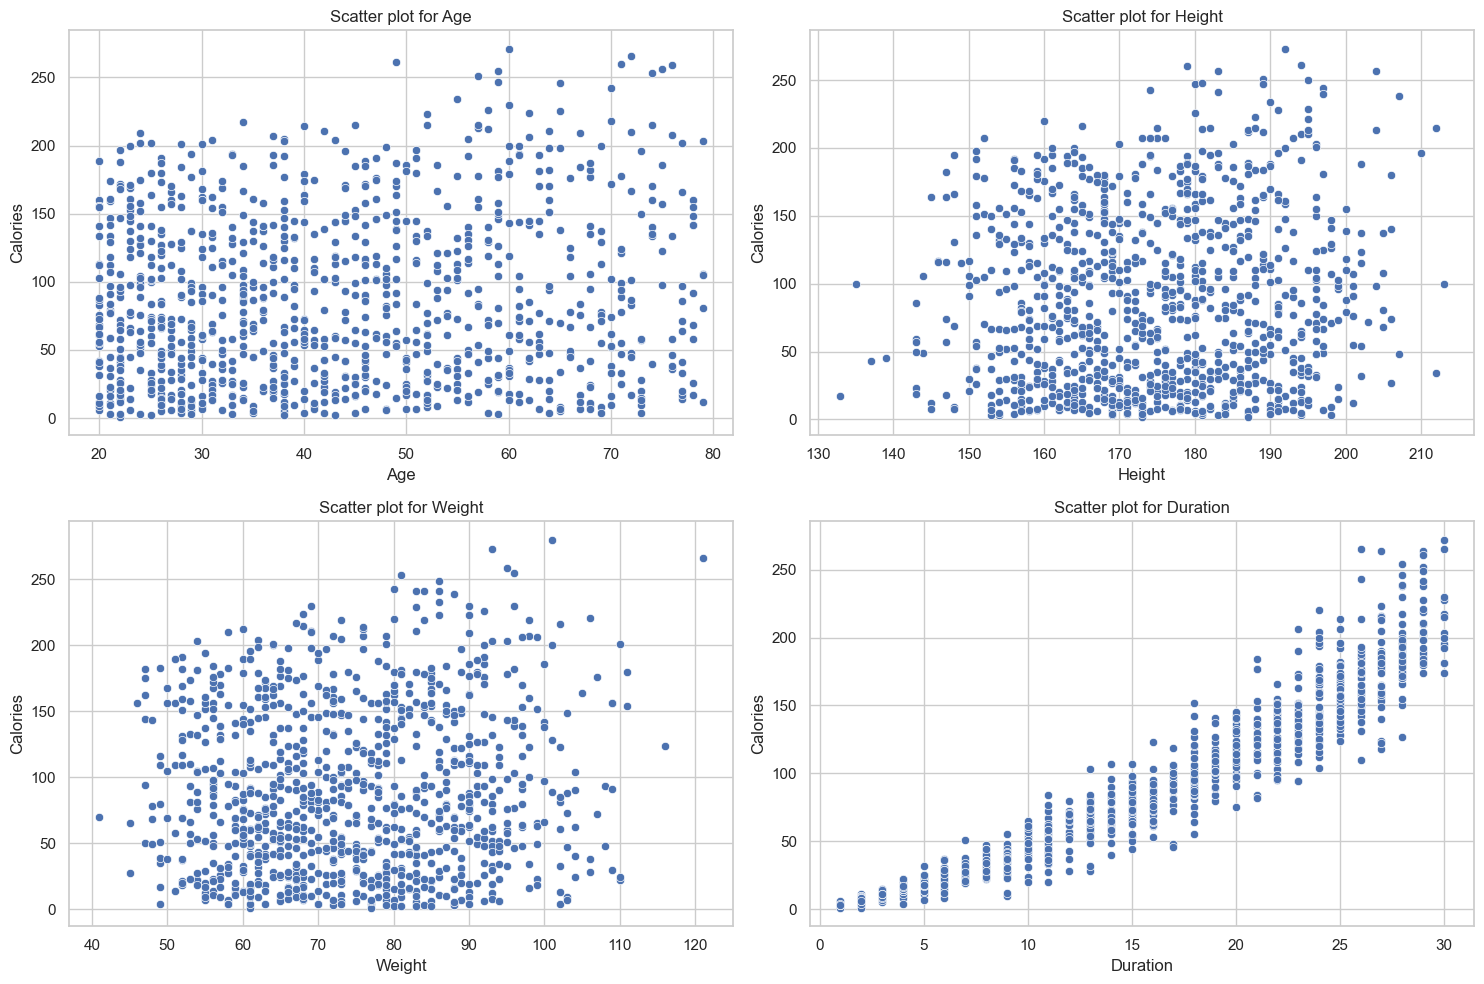

In [21]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = calories_data.sample(1000)
    sns.scatterplot(x=x[col], y=x['Calories'])  
    plt.title(f'Scatter plot for {col}')
    
plt.tight_layout()
plt.show()

Higher is the duration of the workout, higher is the calories burned. We cannot observe any relation between calories burned and height or weight. 

## Exploring Strong Correlations
Observing the data, it's evident that height and weight share a correlation of 1.0, indicating an exceptionally strong relationship. Common sense dictates that if an individual is notably taller, their weight tends to be higher as well. This highlights the profound influence of the height and weight correlation.
<br /> <br />
However, the focus shifts to more critical correlations. We are intrigued by understanding the extent of the correlation between duration and calories burned. Additionally, we seek insights into the correlation between heart rate and calories expended during physical activity.

### Understanding Exercise Impact on Caloric Burn
Engaging in prolonged exercise is likely to result in a higher calorie burn. This correlation is evident in the strong association between exercise duration and calories expended. As the duration increases, there is a corresponding rise in calories burned. Moreover, this connection extends to heart rate—when individuals exercise for an extended period, their heart rate tends to increase, further establishing a correlation between heart rate and exercise duration.


### Heart Rate, Body Temperature, and Caloric Expenditure
Similarly, this pattern holds true for body temperature. Hence, these three columns—duration, heart rate, and body temperature—demonstrate a positive correlation with the calories expended, emphasizing the interconnected influence of these factors on caloric expenditure.

## Converting Categorical Variables

>In data processing, when dealing with categorical variables like the 'gender' column, which is initially represented as a string, it becomes necessary to convert it into a numerical format. Computers inherently understand numerical data better than strings. This conversion facilitates the computational processes and analysis, allowing the computer to efficiently handle and interpret the gender information for various applications.

In [22]:
calories_data.replace({'Gender' : {'male':0,'female':1}}, inplace=True)

In [23]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


### Separating Features and Target

In [24]:
X = calories_data.drop(columns=['Calories', 'User_ID'], axis=1)
Y = calories_data['Calories']

In [25]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [26]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


### Normalizing the features
To obtain stable and fast training.

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = LinearRegression()

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

results = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
print(results)

mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

       Actual   Predicted
7592    127.0  137.492411
3551    224.0  182.181665
9698     38.0   50.158647
3759      6.0   -0.074578
2353    137.0  141.370325
...       ...         ...
8859    177.0  184.433301
2886     49.0   41.950716
14357   145.0  157.566372
9430     24.0   16.549244
11870    90.0  100.210471

[3000 rows x 2 columns]
Mean Squared Error: 130.08707386188385
R-squared: 0.9668790377181355


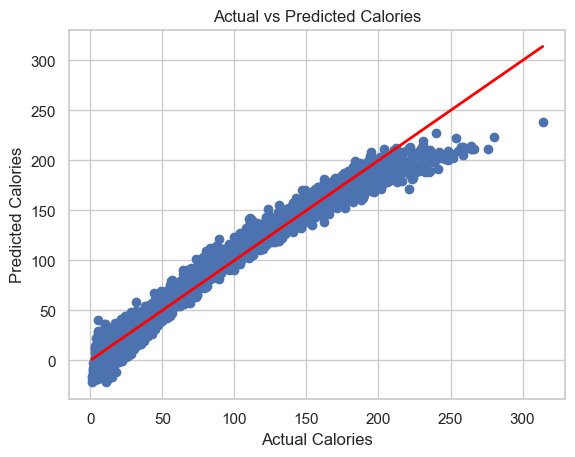

In [31]:
# Plotting the actual vs predicted values with regression line
plt.scatter(Y_test, predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='-', color='red', linewidth=2)  
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()


The linear regression model used to predict calories is quite accurate, as most of the data points are located near the line of perfect correspondence. However, there are some variations, as indicated by points deviating from the red line, suggesting that there may be some less precise predictions.

## Body Mass Index (BMI)
BMI is a measurement of a person's leanness or corpulence based on their height and weight, and is intended to quantify tissue mass. It is widely used as a general indicator of whether a person has a healthy body weight for their height. Specifically, the value obtained from the calculation of BMI is used to categorize whether a person is underweight, normal weight, overweight, or obese depending on what range the value falls between. These ranges of BMI vary based on factors such as region and age, and are sometimes further divided into subcategories such as severely underweight or very severely obese. Being overweight or underweight can have significant health effects, so while BMI is an imperfect measure of healthy body weight, it is a useful indicator of whether any additional testing or action is required.

$$ \text{BMI} = \frac{\text{mass (kg)}}{\text{height}^2 (\text{m})} $$


In [32]:
def calculate_bmi(height, weight):
    return weight / ((height / 100) ** 2)

calories_data['BMI'] = calories_data.apply(lambda row: calculate_bmi(row['Height'], row['Weight']), axis=1)
print(calories_data)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5   

       Calories        BMI 

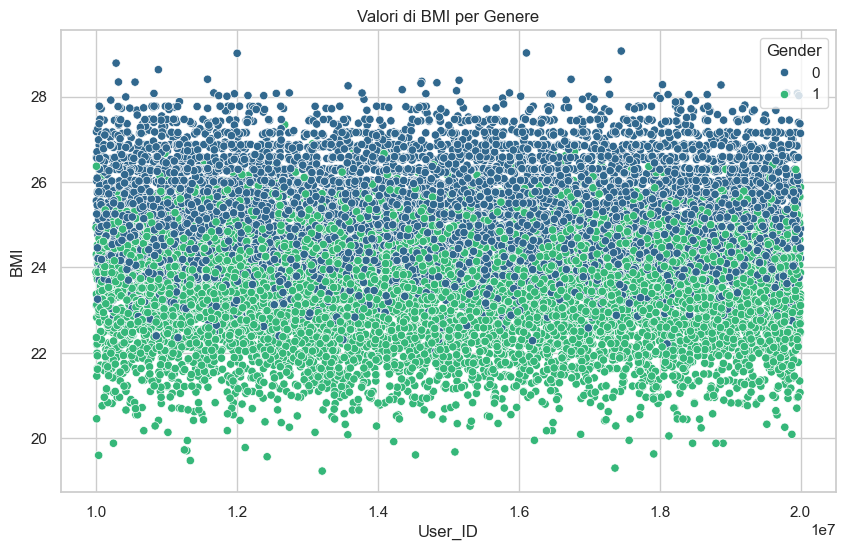

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=calories_data, x='User_ID', y='BMI', hue='Gender', palette='viridis')
plt.title('Valori di BMI per Genere')
plt.xlabel('User_ID')
plt.ylabel('BMI')
plt.show()

After calculating the BMI, it is possible to enhance the understanding of the results by transforming the numerical BMI value into a textual representation that provides a clearer insight into weight categories.

In [34]:
def categorize_bmi(bmi_value):
    if bmi_value < 16:
        return 'Severe Thinness'
    elif 16 <= bmi_value < 17:
        return 'Moderate Thinness'
    elif 17 <= bmi_value < 18.5:
        return 'Mild Thinness'
    elif 18.5 <= bmi_value < 25:
        return 'Normal'
    elif 25 <= bmi_value < 30:
        return 'Overweight'
    elif 30 <= bmi_value < 35:
        return 'Obese Class I'
    elif 35 <= bmi_value < 40:
        return 'Obese Class II'
    else:
        return 'Obese Class III'

calories_data['BMI_Category'] = calories_data['BMI'].apply(categorize_bmi)
print(calories_data)


        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5   

       Calories        BMI 

In [35]:
print(calories_data['BMI_Category'].value_counts())

BMI_Category
Normal        9792
Overweight    5208
Name: count, dtype: int64


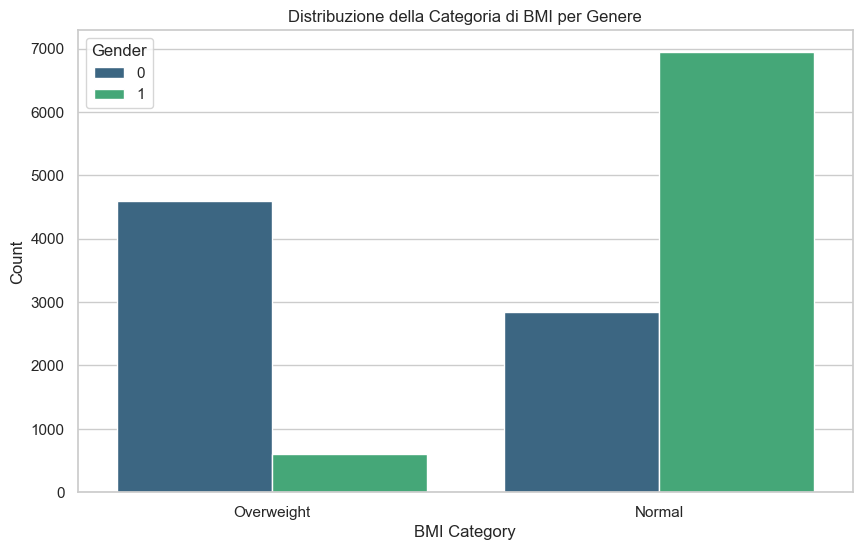

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=calories_data, x='BMI_Category', hue='Gender', palette='viridis')
plt.title('Distribuzione della Categoria di BMI per Genere')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


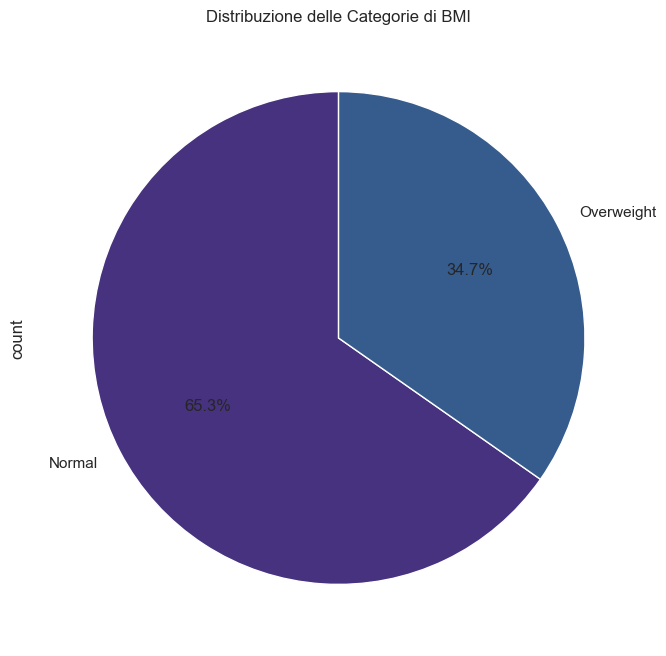

In [37]:
plt.figure(figsize=(8, 8))
calories_data['BMI_Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Distribuzione delle Categorie di BMI')
plt.show()

The reason why only the "Normal" and "Overweight" classes are present in the dataset could be attributed to various factors. One reason might be linked to the nature of the dataset itself or the reference population. 
<br/> <br/>
Another possible explanation could stem from the data acquisition sources. If the dataset was collected from specific sources such as clinical studies, medical centers, or particular populations, it is possible that these sources focused their data collection efforts only on certain BMI categories.

## Basal Metabolic Rate (BMR)
The Basal Metabolism (MB) or BMR (Basal Metabolic Rate) is an estimate of the number of calories you would burn if you had to rest for 24 hours. It represents the minimum amount of energy needed to maintain the functioning of the body, including breathing and maintaining the heartbeat.


$$ 
\text{BMR (for men)} = 10 \times \text{weight (kg)} + 6.25 \times \text{height (cm)} - 5 \times \text{age (years)} + 5 \, \text{kcal/day}
\\ \ \\

\text{BMR (for women)} = 10 \times \text{weight (kg)} + 6.25 \times \text{height (cm)} - 5 \times \text{age (years)} - 161 \, \text{kcal/day}


 $$


In [38]:
def calculate_bmr(age, height, weight, gender):
    if gender == 0:  
        return 10 * weight + 6.25 * height - 5 * age + 5
    else:  
        return 10 * weight + 6.25 * height - 5 * age - 161

calories_data['BMR'] = calories_data.apply(lambda row: calculate_bmr(row['Age'], row['Height'], row['Weight'], row['Gender']), axis=1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI_Category,BMR
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,Overweight,1792.50
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,Normal,1376.50
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,Normal,1568.75
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,Normal,1497.75
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,Normal,1246.50


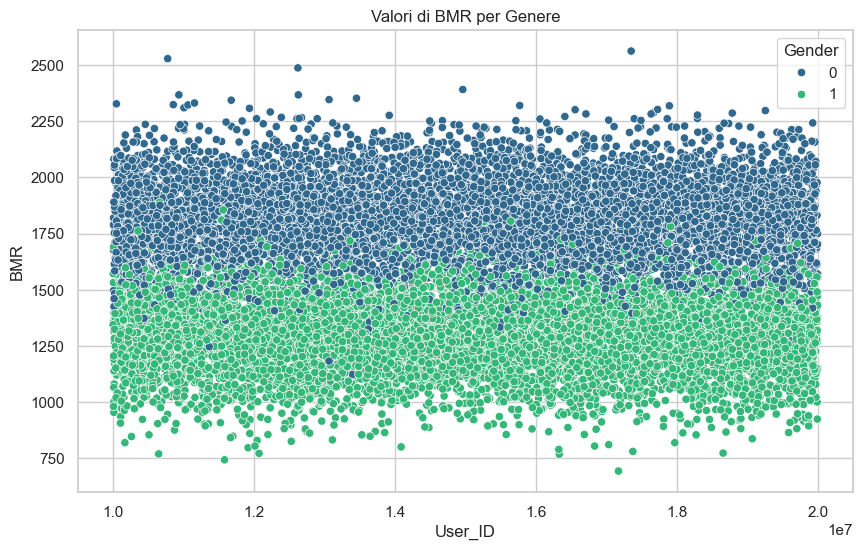

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=calories_data, x='User_ID', y='BMR', hue='Gender', palette='viridis')
plt.title('Valori di BMR per Genere')
plt.xlabel('User_ID')
plt.ylabel('BMR')
plt.show()

Then, this BMR count is multiplied, depending on the activity level:
- Sedentary = 1.2
- Lightly active = 1.375
- Moderately active = 1.550
- Very active = 1.725
- Extra active = 1.9
<br/>

The calorie count is then adjusted based on your goal:
- Weight loss: Reduce by 10-20%
- Weight gain: Add 500 calories
- Weight maintenance: Unchanged



## Calculate Activity Level
The workout duration can provide an approximation of the intensity level of the performed physical activity. Here's a general scale to give an idea:

- **Sedentary:** 
    - Less than 30 minutes of light physical activity per week.
- **Lightly Active:** 
    - 30-150 minutes of light physical activity per week.
    - Or 15-75 minutes of moderate physical activity per week.
- **Moderately Active:**
    - 150-300 minutes of light physical activity per week.
    - Or 75-150 minutes of moderate physical activity per week.
- **Very Active:**
    - 300-450 minutes of light physical activity per week.
    - Or 150-225 minutes of moderate physical activity per week.
- **Extra Active:**
    -  Over 450 minutes of light physical activity per week.
    - Over 225 minutes of moderate physical activity per week.

It's important to note that these are indicative parameters.

In [40]:
def categorize_activity(duration):
    if duration < 30:
        return 'Sedentary'
    elif 30 <= duration < 150:
        return 'Lightly Active'
    elif 150 <= duration < 300:
        return 'Moderately Active'
    elif 300 <= duration < 450:
        return 'Very Active'
    else:
        return 'Extra Active'

calories_data['Activity_Level'] = calories_data['Duration'].apply(categorize_activity)
print(calories_data['Activity_Level'].value_counts())


Activity_Level
Sedentary         14745
Lightly Active      255
Name: count, dtype: int64


In [41]:
activity_levels = {
        'Sedentary': 1.2,
        'Lightly Active': 1.375,
        'Moderately Active': 1.55,
        'Very Active': 1.725,
        'Extra Active': 1.9
    }

def calculate_calories_food(row):
    bmr = row['BMR']
    activity_level = row['Activity_Level']    
    return bmr * activity_levels.get(activity_level, 1.2)

calories_data['calories_food'] = calories_data.apply(calculate_calories_food, axis=1)
print(calories_data)


        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5   

       Calories        BMI 

## Cosine Similarity

In [42]:
age_test = 22
height_test = 180.0
weight_test = 70.0
gender_test = 0

df_test = pd.DataFrame([[age_test, height_test, weight_test, gender_test]], columns=['Age', 'Height', 'Weight', 'Gender'])
df_test.head()

,Age,Height,Weight,Gender
0,22,180.0,70.0,0


In [43]:
df_test['BMI'] = df_test.apply(lambda row: calculate_bmi(row['Height'], row['Weight']), axis=1)
df_test['BMR'] = df_test.apply(lambda row: calculate_bmr(row['Age'], row['Height'], row['Weight'], row['Gender']), axis=1)

print(df_test)

   Age  Height  Weight  Gender        BMI     BMR
0   22   180.0    70.0       0  21.604938  1720.0


In [44]:
bmi_test = df_test['BMI'].values[0]

# Euclidean Distance
calories_data['BMI_Difference'] = np.abs(calories_data['BMI'] - bmi_test)
calories_data_sorted = calories_data.sort_values('BMI_Difference')
print(calories_data_sorted[['User_ID', 'BMI', 'BMI_Difference']].head(10))

        User_ID        BMI  BMI_Difference
6750   14199182  21.604105        0.000833
1083   16684429  21.604105        0.000833
14273  15635492  21.604105        0.000833
8201   11260824  21.604105        0.000833
5419   10427860  21.604105        0.000833
8873   16419920  21.604105        0.000833
4867   11252629  21.604105        0.000833
10376  16408324  21.604105        0.000833
11224  16039213  21.604105        0.000833
11327  19688237  21.604105        0.000833


In [45]:
top_3_similar = calories_data_sorted.head(3)
top_3_calories = top_3_similar['Calories'] 
top_3_duration = top_3_similar['Duration']

print("Top 3 calories: \n", top_3_calories)
print("\nTop 3 duration: \n", top_3_duration)

Top 3 calories: 
 6750      76.0
1083      80.0
14273    174.0
Name: Calories, dtype: float64

Top 3 duration: 
 6750     15.0
1083     17.0
14273    25.0
Name: Duration, dtype: float64
